# <center> TP1 : Vision par Ordinateur </center>

***
# Plan :
*** 

## I. Les bases du Traitement d'Image (TI) 

1. Introduction sur les images numériques
2. Charger (lire) une image
3. Visualiser une image dans un espace de couleur
4. Calculer des statistiques (ex. la couleur moyenne) d'une image
5. Dessiner sur une image
6. Séparer et fusionner les canaux d'une image
7. Sauvegrader une image modifiée


## II. Opérations géométriques sur l'image
<!-- Il existe de nombreuses opérations géométriques possibles sur une image. 
Quelques exemples: -->

1. Changement d'échelle / redimensionnement
2. Rogner une image
3. Masquage 
4. Transformations géométriques

<!--
4. Rotation  
5. Translations  
6. Transformation affine 
7. Changement de perspective  

**Si vous voulez aller plus loin:** https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

-->
    


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import pylab as pl

%matplotlib inline
# Spécifie que les figures affichées par matplotlib doivent être dans le document et pas dans une fenêtre à part

### <span style="color:crimson">**[Exercice]**:</span>
***
<div style="color:DarkSlateBlue">  

1. Charger une image dans un espace de couleur (RGB) puis en niveaux de gris
2. Affichez les dimensions de l'image 
3. Affichez le nombre total de pixels dans l'image
4. Afficher l'image dans une fenêtre avec un titre
</div>

Ex : 

OpenCV :  img = cv2.imread("images/lena.jpg")#, cv2.IMREAD_COLOR) #, cv2.IMREAD_GRAYSCALE

Remarque: OpenCV stocke les images qu'il lit (imread) en format BGR (Blue-Green-Red), alors que matplotlib (et la plupart des autres librairies) utilisent le format standard RGB (Red-Green-Blue).

Il faut donc convertir les cannaux de l'image chargée par OpenCV de BGR vers RGB avant de l'afficher avec plt.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

On parle de changement d'espace colorimétrique. 


PS:
Comparer les modules Matplotlib, OpenCV, PIL, Skimage ... 

Qu'est ce que vous remarquez comme contraintes en lecture et en affichage pour OpenCV ?

Essayez de changer d'espace colorimétrique de RGB en d'autres espaces YCrCb, HSV, Luv, Lab ...


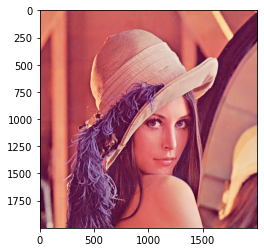

In [2]:
# Importez l'image avec OpenCV en couleur
# A Faire
# Comparaison : OpenCV stocke et lit l'image alors que Matplolib affiche l'image
img = cv2.imread("images/lena.jpg")
img.shape
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)


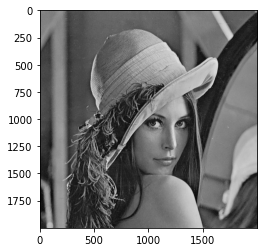

In [3]:
# Importez l'image avec OpenCV en NG
# A Faire
img = cv2.imread("images/lena.jpg")
image2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(image2, cmap="gray")

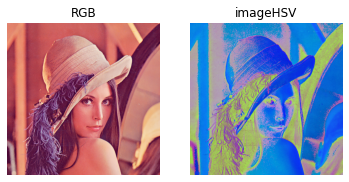

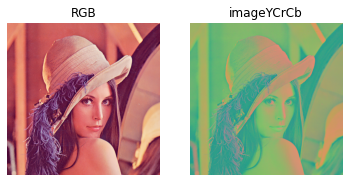

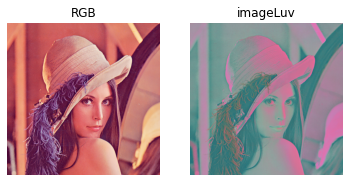

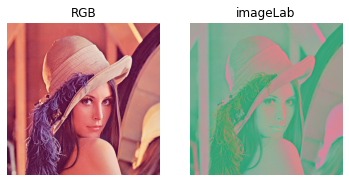

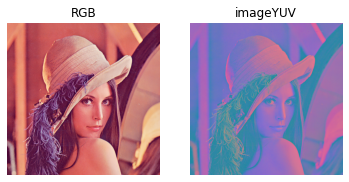

In [4]:
# Définissons une fonction pour afficher trois plots les uns à côté des autres
def display(image, image1,espace):
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    plt.imshow(image)
    ax.set_title("RGB")
    ax.axis("off")
    ax = fig.add_subplot(1,2,2)
    plt.imshow(image1)
    ax.set_title(espace)
    ax.axis("off")



image = cv2.imread("images/lena.jpg")
# A compléter
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageYCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
imageLuv = cv2.cvtColor(image, cv2.COLOR_BGR2Luv)
imageLab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imageYUV = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Appliquons cette fonction aux canaux de notre image
display(imageRGB,imageHSV,"imageHSV")
display(imageRGB,imageYCrCb,"imageYCrCb")
display(imageRGB, imageLuv, "imageLuv")
display(imageRGB, imageLab, "imageLab")
display(imageRGB, imageYUV, "imageYUV")

### <span style="color:crimson">**[Q.]**:</span>
1. Créer une image (matrice) de taille 50*50 dont tous les pixels ont cette la couleur moyenne en couleur de l'image

In [5]:
def avg_color(image):
    resRGB = np.mean(image, axis=(0,1))
    return resRGB

[105.443612    99.07227875 180.23641425]
Code BGR : [105  99 180]
Code RGB : [180  99 105]


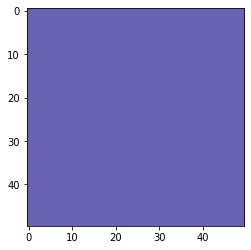

In [6]:
img = cv2.imread("images/lena.jpg")
mean = avg_color(img)

print(mean)
bgr_color = np.array([105, 99, 180])

# Inversez les canaux
rgb_color = bgr_color[[2, 1, 0]]

# Affichez le résultat
print("Code BGR :", bgr_color)
print("Code RGB :", rgb_color)

#On crée une image (matrice) de 50*50 dont tous les pixels ont cette couleur 
img = np.ones((50,50,3), dtype="uint8")
img[:, :] = mean
plt.imshow(img)

### <span style="color:crimson">**[Exercice]**:</span>
***
<div style="color:DarkSlateBlue">  

1. Ajouter des figures géométriques (ligne, cercle, ...) sur une image 
2. Créer une image vide de taille=2**8 dans laquelle on va créer une série de I et de L (de manière aléatoire)
3. Sauvegarder le résultat dans le répertoire "tmp"

</div>




Ici nous allons utiliser:
- ```image``` module from ```matplotlib``` (as mpimg) pour charger l'image
- ```OpenCV``` pour dessiner dessus, avec les méthodes:
    ```Python
    cv2.circle(image, (x, y), rayon, (b,g,r), épaisseur)
    cv2.rectangle(image, (x1,y1), (x2,y2), (b,g,r), épaisseur)
    cv2.line(image, (x1,y1), (x2,y2), (b,g,r), épaisseur)
    cv2.imwrite pour sauvegaredr une image : cv2.imwrite(dest, image))
    cv2.split pour extraire les différents canaux d'une image
    cv2.getRotationMatrix2D / cv2.warpAffine  pour des tranbsformations géométriques
    ```
- ```pyplot``` module from ```matplotlib``` (as plt) pour afficher le résultat


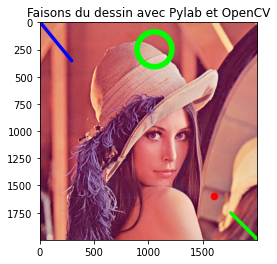

In [7]:
from PIL import Image
import matplotlib.image as mpimg
import pylab as pl

# Deux choix pour charger l'image avec le module Image de PIL et la converture en matrice avec Pylab
imgRGB = pl.array(Image.open('images/lena.jpg'))
#image module from matplotlib (as mpimg) pour charger l'image
imgRGB = mpimg.imread('images/lena.jpg')
# Afficher l'image
pl.imshow(imgRGB)




# Créons deux listes de coordonnées. 
x = [0,250,500,750,1000,1250,1500,1750,2000]
y = [0,250,500,750,1000,1250,1500,1750,2000]

centre_x = 1050 
centre_y = 250
rayon = 160
x_centre = 100
y_centre = 100


res = cv2.line(imgRGB, (0, 0), (290, 355), (0, 0, 255), 30)
res = cv2.circle(imgRGB, (centre_x, centre_y), rayon, (0, 255, 0), 50)
res = cv2.line(imgRGB, (1750, 1750), (2500, 2500), (0, 255, 0), 30)
res = cv2.line(imgRGB, (1600, 1600), (1600, 1600), (255, 0, 0), 70)










plt.title("Faisons du dessin avec Pylab et OpenCV")
pl.imshow(res)
pl.show()

In [8]:
# J'enregistre mon image res dans le sous-dossier "tmp", sous le nom "test.png"
cv2.imwrite("/tmp/test.png", res) 


True

### <span style="color:crimson">**[Exercice]**:</span>
***
<div style="color:DarkSlateBlue">  

1. Séparer les trois canaux d'une image en couleur  (de différentes manières OpenCV, numpy, ...)
2. Afficher les 3 images 
3. reconstruire l'image à partir des 3 composantes

</div>




In [9]:
# Séparons les canaux d'une image : deux manières de faire
# A compléter ....
red,green,blue = cv2.split(res)


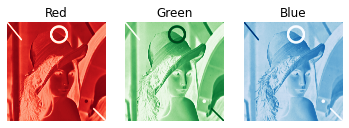

In [10]:
# Définissons une fonction pour afficher trois plots les uns à côté des autres
def displayRGB(r,g,b):
    fig = plt.figure()
    ax = fig.add_subplot(1,3,1)
    plt.imshow(r, "Reds")
    ax.set_title("Red")
    ax.axis("off")
    ax = fig.add_subplot(1,3,2)
    plt.imshow(g, "Greens")
    ax.set_title("Green")
    ax.axis("off")
    ax = fig.add_subplot(1,3,3)
    plt.imshow(b, "Blues")
    ax.set_title("Blue")
    ax.axis("off")

# Appliquons cette fonction aux canaux de notre image
displayRGB(red, green, blue)

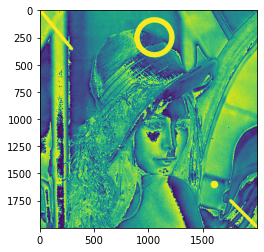

In [11]:
# On crée une nouvelle image "new" à partir des 3 cannaux obtenus par le split précédent
# A compléter ...
r = red
g = green
b = blue
new= (r + g + b)//3
plt.imshow(new)

### <span style="color:crimson">**[Exercice]**:</span>
***
<div style="color:DarkSlateBlue">  

1. Redimensionner une image (avec OpenCV, Pillow, skimage)
2. Rogner une image
3. Masquer une image
4. Faire une rotation de l'image (45°) avec OpenCV,skimage et PIL
</div>




## II.1 Redimensionner une image

Dimensions de l'image :  (4000, 4000, 3)


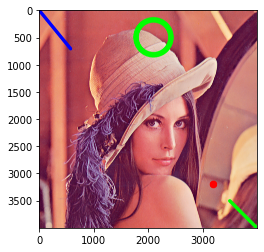

In [12]:
#Avec OpenCV
# On redimensionne l'image par un facteur de 2 sur l'axe x et y, et on enregistre le résultat dans la variable res

axes = (res.shape[0]*2, res.shape[1]*2)
res = cv2.resize(res, axes, interpolation = cv2.INTER_AREA)

print("Dimensions de l'image : ", res.shape)

plt.imshow(res)




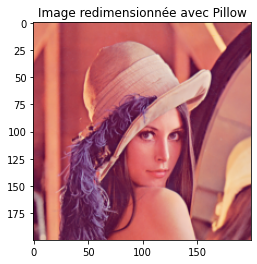

In [13]:
#Avec PIL
img = Image.open('images/lena.jpg')
# Divisons la taille de l'image par 10 : de 2000*2000 à 200*200
img = img.resize([200, 200], Image.BILINEAR)


plt.title("Image redimensionnée avec Pillow")
plt.imshow(img)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


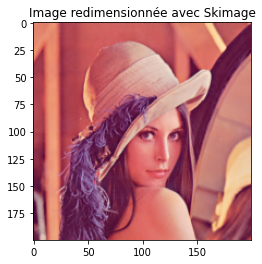

In [14]:
#Avec Skimage
from skimage import io, transform
import matplotlib.pyplot as plt

# A compléter
im = io.imread('images/lena.jpg')
im = transform.resize(im, (200, 200))
plt.title("Image redimensionnée avec Skimage")
plt.imshow(im)

## II.2 Rogner une image
Rogner une image consiste à sélectionner une sous-portion de l'image.  

<img src="https://www.photoweb.fr/espaces/magazine/wp-content/uploads/sites/3/2018/06/comment-rogner-photo-en-ligne-facilement.jpg" width="300">

Nous allons effectuer cette opération avec Pillow: il va falloir définir un rectangle (box) qui correspond à la section que l'on veut rogner.
```Python
box = (left, top, left + largeur_box, top + hauteur_box)
```

Il nous faut donc d'abord trouver ces coordonnées.
- Une méthode est d'utiliser la fenetre d'affichage d'OpenCV, qui indique les coordonnées du pixel pointé par la souris.

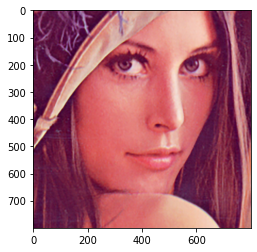

In [16]:
im = Image.open("images/lena.jpg")

left = 700
top = 840
width = 800
height = 800

#A compléter ....

box = (left, top, left + width, top + height)
region = im.crop(box)
plt.imshow(region)


## II.3 Masquer une image:
Opération qui consiste à appliquer un "masque" sur une image afin de spécifier (spatialement) quels pixels seront modifiés ou non.

Ici un masque qui supprime (valeur à 0) tous les pixels hors des zones sélectionnées :  
<img src="https://www.w3.org/TR/css-masking-1/images/luminance-mask.svg">


Text(0.5, 1.0, 'Image masquée avec OpenCV')

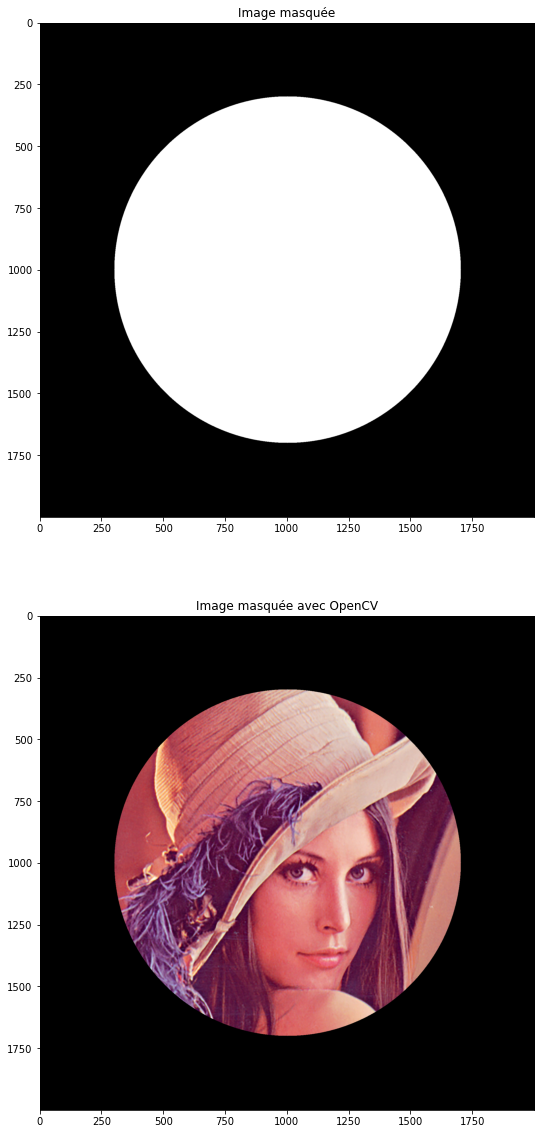

In [36]:
img = cv2.imread("images/lena.jpg")
imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# A compléter ...
# Masquer une image avec OpenCV
centre_x = imageRGB.shape[0]//2
centre_y = imageRGB.shape[1]//2
rayon = 700
mask = np.zeros(imageRGB.shape[:2], dtype="uint8")
circle = cv2.circle(mask, (centre_x, centre_y), rayon, 255, -1)
masked = cv2.bitwise_and(imageRGB, imageRGB, mask=circle)

plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
plt.imshow(circle, cmap="gray")
plt.title("Image masquée")

plt.subplot(2, 1, 2)
plt.imshow(masked)
plt.title("Image masquée avec OpenCV")






## II.4 Rotation d'une image:

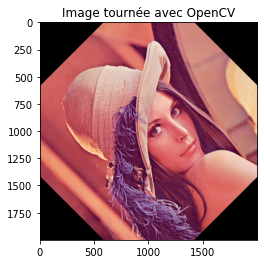

In [25]:
#OpenCV
img = cv2.imread("images/lena.jpg")
imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# A compléter ...
# Rotation avec OpenCV
centre_x = imageRGB.shape[0]//2
centre_y = imageRGB.shape[1]//2
angle = 45
M = cv2.getRotationMatrix2D((centre_x, centre_y), angle, 1.0)
rotated = cv2.warpAffine(imageRGB, M, (imageRGB.shape[1], imageRGB.shape[0]))
plt.title("Image tournée avec OpenCV")
plt.imshow(rotated)


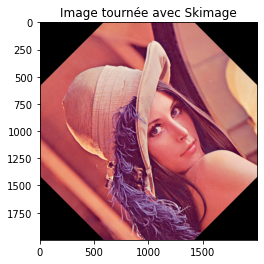

In [26]:
#skimage

# A compléter ...
# Rotation avec Skimage
from skimage import io, transform
import matplotlib.pyplot as plt
im = io.imread('images/lena.jpg')
im = transform.rotate(im, 45)
plt.title("Image tournée avec Skimage")
plt.imshow(im)

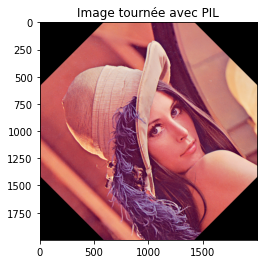

In [27]:
#PIL
# A compléter ...
# Rotation avec PIL
from PIL import Image
import matplotlib.image as mpimg
import pylab as pl
img = Image.open('images/lena.jpg')
img = img.rotate(45)
plt.title("Image tournée avec PIL")
plt.imshow(img)

# Bonus :

Afficher des L et des I avec des rotations aléatoires

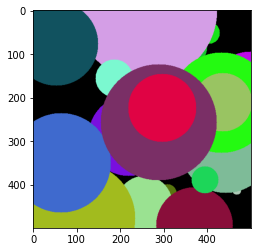

In [28]:
# Afficher des L et des I avec des rotations aléatoires avec OpenCV


[0.08333333 0.16666667 0.25       0.33333333 0.41666667 0.5
 0.58333333 0.66666667 0.75       0.83333333 0.91666667 1.        ]


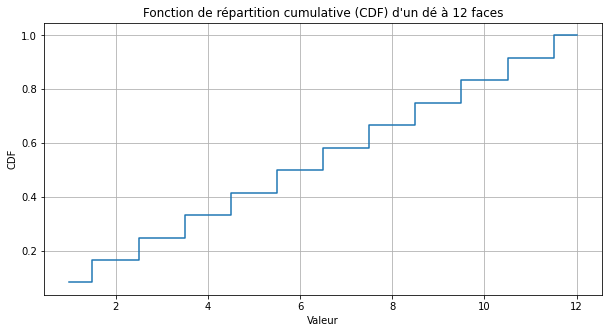

3.5


-1.2685714285714282

<div style="color:Navy"> 

***
# Fin du TP1
***
    
</div>